## IDEA: 
### Younger people tend to use Citi Bike more often than older people in the evenings

## NULL HYPOTHESIS:
### The proportion of people born before 1980 biking between 7pm-3am is the same or higher than the proportion of people born in or after 1980 biking biking between 7pm-3am. 

## Alternative HYPOTHESIS:
### The proportion of people born before 1980 biking between 7pm-3am is significatily lower than the proportion of people born in or after 1980 biking biking between 7pm-3am. 

In [80]:
from __future__ import print_function
import os
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
    puidata = os.getenv("PUIDATA")

In [81]:
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/yf1150/PUIdata


In [82]:
# get data from CitiBike
!curl https://s3.amazonaws.com/tripdata/JC-201805-citibike-tripdata.csv.zip > bikedata.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  887k  100  887k    0     0  5173k      0 --:--:-- --:--:-- --:--:-- 5192k


In [9]:
from zipfile import PyZipFile

In [11]:
!unzip bikedata.zip -d $PUIDATA

Archive:  bikedata.zip
  inflating: /nfshome/yf1150/PUIdata/JC-201805-citibike-tripdata.csv  


In [12]:
import pandas as pd
bikedata = pd.read_csv("%s/JC-201805-citibike-tripdata.csv"%os.getenv("PUIDATA"))

In [13]:
bikedata.head(7)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,131,2018-05-01 07:29:57.5490,2018-05-01 07:32:08.6160,3183,Exchange Place,40.716247,-74.033459,3184,Paulus Hook,40.714145,-74.033552,29617,Subscriber,1966,1
1,73,2018-05-01 08:13:58.2560,2018-05-01 08:15:11.9230,3183,Exchange Place,40.716247,-74.033459,3184,Paulus Hook,40.714145,-74.033552,29288,Subscriber,1975,1
2,4929,2018-05-01 08:17:21.3110,2018-05-01 09:39:31.0770,3183,Exchange Place,40.716247,-74.033459,3183,Exchange Place,40.716247,-74.033459,29520,Customer,1969,0
3,432,2018-05-01 08:25:58.7150,2018-05-01 08:33:10.8960,3183,Exchange Place,40.716247,-74.033459,3202,Newport PATH,40.727224,-74.033759,29595,Subscriber,1973,1
4,432,2018-05-01 08:28:09.9160,2018-05-01 08:35:22.1440,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,33623,Subscriber,1959,1
5,3191,2018-05-01 10:05:06.9770,2018-05-01 10:58:18.6910,3183,Exchange Place,40.716247,-74.033459,3212,Christ Hospital,40.734786,-74.050444,33593,Customer,1969,0
6,446,2018-05-01 12:09:18.8750,2018-05-01 12:16:44.8850,3183,Exchange Place,40.716247,-74.033459,3202,Newport PATH,40.727224,-74.033759,33577,Subscriber,1969,0


In [83]:
bikedata.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [84]:
# reduce dataframe
df = bikedata[['starttime','birth year']]

In [58]:
df.replace('\s+', '_',regex=True,inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [85]:
df['birth year'][1]

1975

In [86]:
df.starttime[0]

'2018-05-01 07:29:57.5490'

In [87]:
df.head(7)

,starttime,birth year
0,2018-05-01 07:29:57.5490,1966
1,2018-05-01 08:13:58.2560,1975
2,2018-05-01 08:17:21.3110,1969
3,2018-05-01 08:25:58.7150,1973
4,2018-05-01 08:28:09.9160,1959
5,2018-05-01 10:05:06.9770,1969
6,2018-05-01 12:09:18.8750,1969


In [88]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [89]:
from dateutil import parser

In [90]:
df.size

68912

In [91]:
len(df)

34456

In [93]:
time = []
for i in range(len(df)):
    all_time = parser.parse(df['starttime'][i])
    birth_year = df['birth year'][i]
    t = (all_time, birth_year)
    time.append(t)

In [94]:
time[0]

(datetime.datetime(2018, 5, 1, 7, 29, 57, 549000), 1966)

In [95]:
# store data with the same hour into a dictionary
dic = {}
for i in time:
    if i[0].hour not in dic:
        dic[i[0].hour] = [i]
    else:
        dic[i[0].hour].append(i)

In [100]:
dic[0][0][1]

1986

In [110]:
len(dic)

24

In [111]:
X = np.arange(len(dic))

In [112]:
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [116]:
Y = []
for i in dic:
    n_eachhour = len(dic[i])
    Y.append(n_eachhour)

In [118]:
len(Y)

24

In [132]:
Y[0]

249

In [120]:
import pylab as pl

Text(0.5,1,'All Bikers in May 2018')

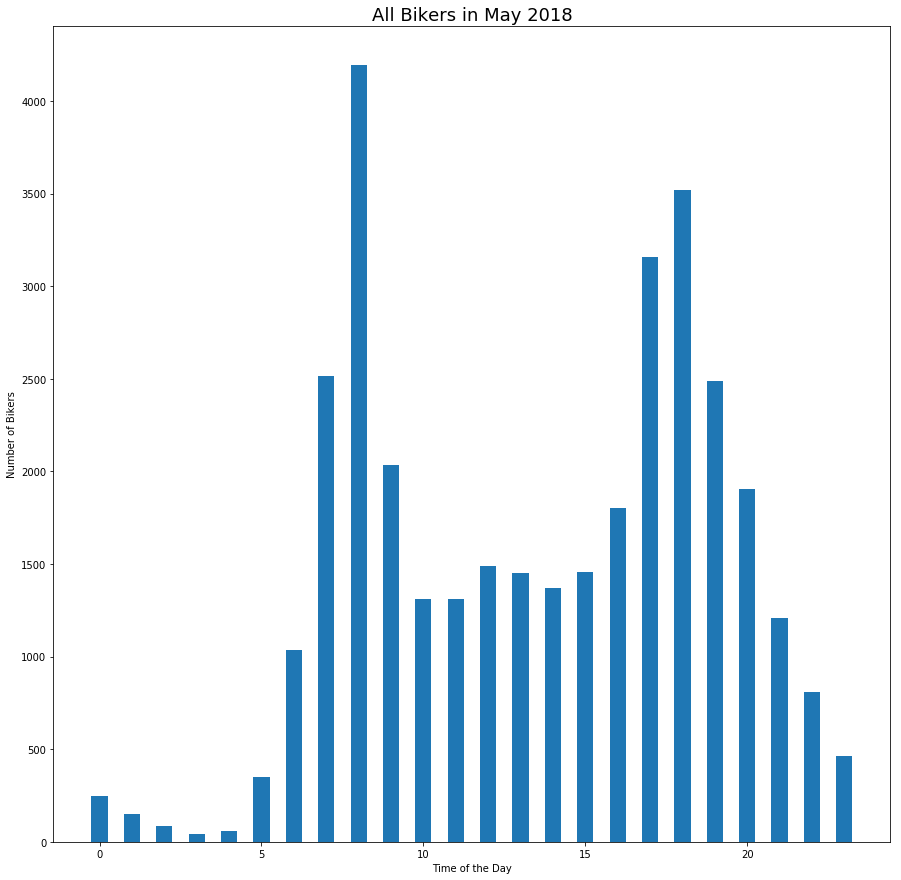

In [142]:
pl.bar(X, Y, align='center', width=0.5)
pl.ylabel('Number of Bikers')
pl.xlabel('Time of the Day')
pl.title('All Bikers in May 2018', fontsize = 18)

##### Figure 1: Total umber of bikers using CitiBike against hour of the day in May 2018

In [136]:
Y_young = []
Y_old = []

for i in dic:
    young = 0
    old = 0
    for a in dic[i]:
        if a[1] >= 1980:
            young+=1
      
        else:
            old+=1
    Y_young.append(young)
    Y_old.append(old)
            

Text(0.5,1,'Bikers Born in or after 1980 in May 2018')

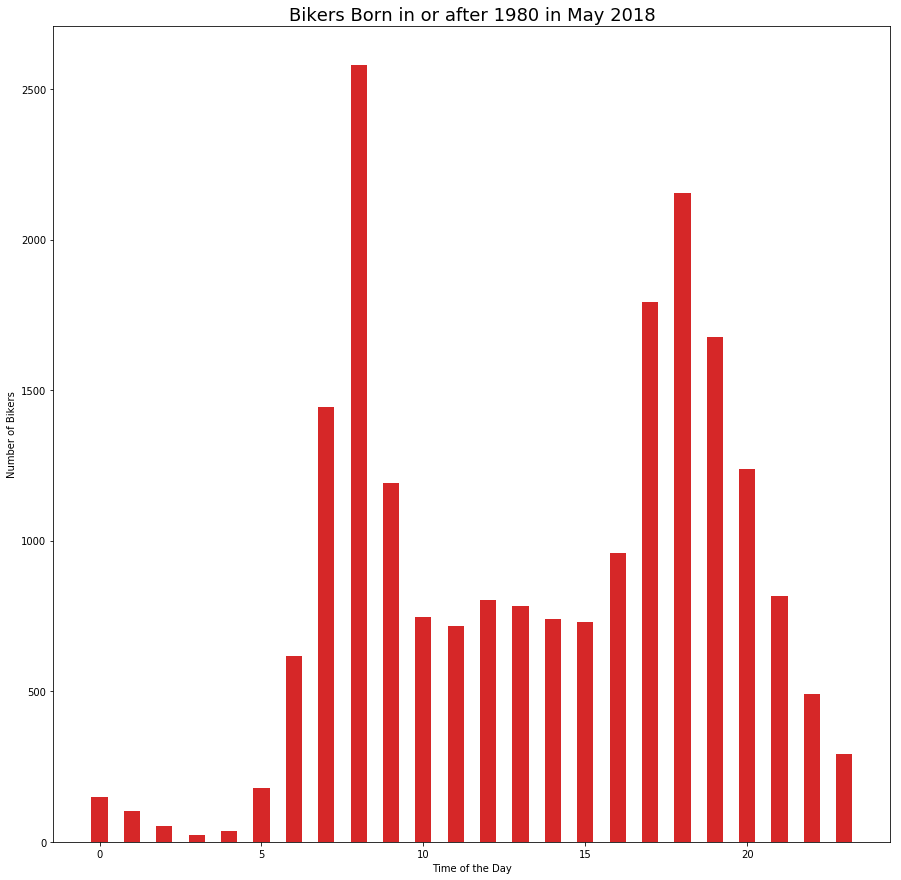

In [152]:
pl.bar(X, Y_young, align='center', width=0.5, color='#d62728')
pl.ylabel('Number of Bikers')
pl.xlabel('Time of the Day')
pl.title('Bikers Born in or after 1980 in May 2018', fontsize = 18)

##### Figure 2: Number of young bikers using CitiBike against hour of the day in May 2018

Text(0.5,1,'Bikers Born before 1980 in May 2018')

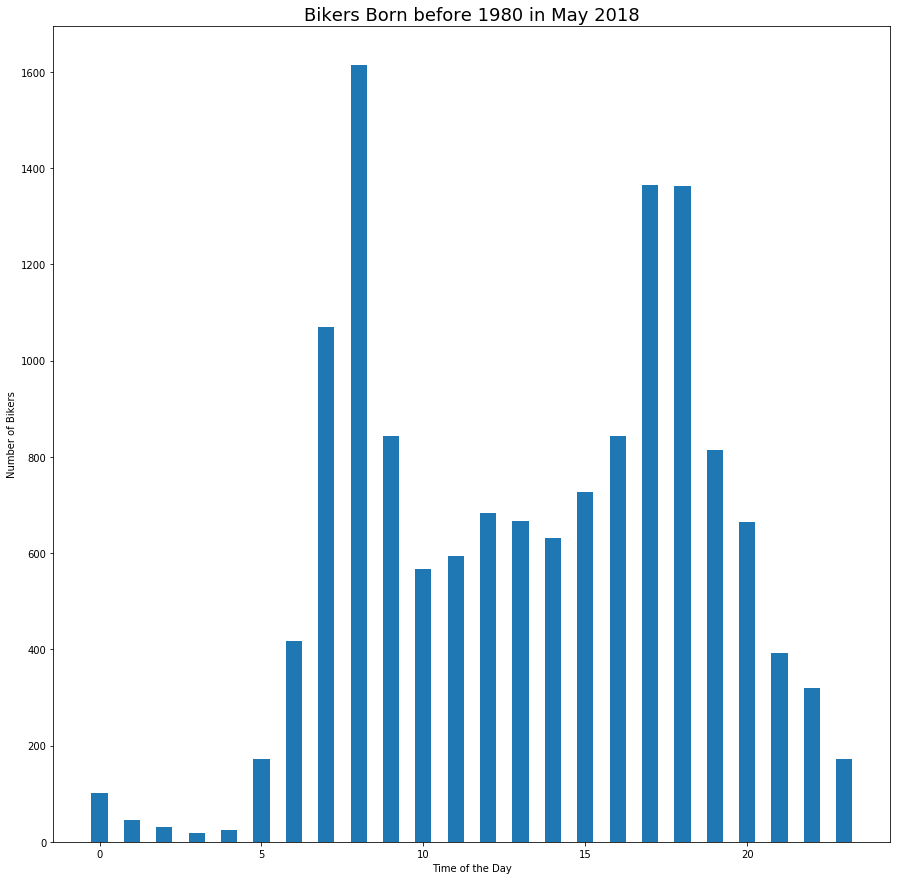

In [144]:
pl.bar(X, Y_old, align='center', width=0.5)
pl.ylabel('Number of Bikers')
pl.xlabel('Time of the Day')
pl.title('Bikers Born before 1980 in May 2018', fontsize = 18)

##### Figure 2: Number of old bikers using CitiBike against hour of the day in May 2018

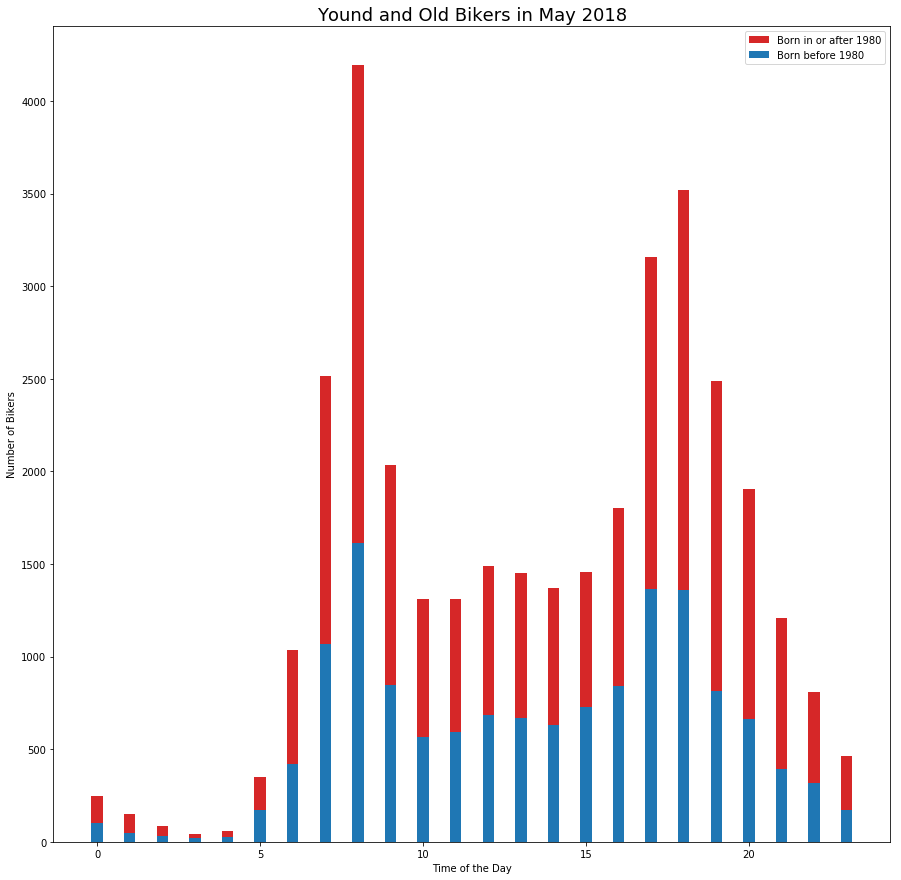

In [168]:
pl.bar(X, Y_old, width)
pl.bar(X, Y_young, width, bottom=Y_old, color='#d62728')
pl.ylabel('Number of Bikers')
pl.xlabel('Time of the Day')
pl.title('Yound and Old Bikers in May 2018', fontsize = 18)
plt.legend((p1[0], p2[0]), ('Born in or after 1980', 'Born before 1980'))

##### Figure 4: Stacked bar chart of both young and old bikers against hour of the day in May 2018